In [1]:
import pickle
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests
from collections import defaultdict

import re
from datetime import datetime
import glob

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [45]:
with open("all_midtown_data.pkl", "rb") as picklefile:
    df = pickle.load(picklefile)

In [2]:
# Remove Building Type column. They are all Condos
df = df.drop("Building Type", axis=1)

# Sort values by date sold
df = df.sort_values(by = 'sold_date_dt', ascending = False)

# Drop duplicate rows
#df_no_dup = df.drop_duplicates(subset = 'full_name', keep = 'first').reset_index(drop = True)
#print("1. Duplicates Removed")

# Add season
df_no_dup['sold_season'] = (df_no_dup['sold_date_dt']
                     .dt
                     .month
                     .map({1 : 'Winter', 
                           2 : 'Winter',
                           3 : 'Spring',
                           4 : 'Spring',
                           5 : 'Spring',
                           6 : 'Summer',
                           7 : 'Summer',
                           8 : 'Summer',
                           9 : 'Fall',
                           10 : 'Fall',
                           11 : 'Fall',
                           12 : 'Winter'}))
print("2. Season Added")

# Add days on market column, and convert datetime timedelta to float
df_no_dup['days_on_market'] = df_no_dup['sold_date_dt'] - df_no_dup['Listed']
df_no_dup['days_on_market'] = (df_no_dup['days_on_market']/np.timedelta64(1, 'D'))
print("3. Days on Market Added")

# Fill to indicate Studio
df_no_dup['beds'] = df_no_dup['beds'].fillna(0)
print("4. Filled Beds to indicate Studio")

### Fixing rows where there is no condo ###
# Find where apt = NaN
df_apt_na = df_no_dup[df_no_dup['apt_floor'].isna()]

# Fill Apt nulls, move bldg address to correct place, and delete bldg name
for index, row in df_apt_na.iterrows():
    #print(row['apt_floor'])
    #print(np.isnan(row['apt_floor']))
    try:
        if np.isnan(row['apt_floor']):
            df_no_dup.loc[index, 'apt_floor'] = int(re.findall('\d+', row['bldg_addr'])[0]) # assign value in full dataframe
            df_no_dup.loc[index, 'bldg_addr'] = df_no_dup.loc[index]['bldg_name'] # move building address over to correct column
            df_no_dup.loc[index, 'bldg_name'] = np.nan # clears building name
            #print(index)
        else:
            continue
    except:
        continue
print("5. Apt Nulls Filled")

# Rename Columns
df_no_dup = df_no_dup.rename(columns = {"Listed": "listed", 
                 "Days on Market": "days_on_market", 
                 "Neighborhood": "neighborhood", 
                 "Monthly Common Charges": "monthly_common_charges", 
                 "Monthly Real Estate Taxes": "monthly_real_estate_taxes", 
                 "Minimum Down Payment": "minimum_down_payment", 
                 "Doorman": "doorman", 
                 "Last Price Change": "last_price_change"})
print("6. Renamed Columns")

return(df_no_dup)

In [3]:
with open("all_midtown_data.pkl", "rb") as picklefile:
    df = pickle.load(picklefile)

In [4]:
# function above
df_clean = clean_data(df)

1. Duplicates Removed
2. Season Added
3. Days on Market Added
4. Filled Beds to indicate Studio
5. Apt Nulls Filled
6. Renamed Columns


In [42]:
df_clean['year'] = df_clean['sold_date_dt'].dt.year

In [7]:
df_clean

,full_name,bldg_name,bldg_addr,apt_floor,bldg_rating,sold_date,sold_date_dt,sold_price,price_per_sqft,square_feet,bed_and_bath,beds,baths,url,listed,days_on_market,neighborhood,monthly_common_charges,monthly_real_estate_taxes,minimum_down_payment,doorman,last_price_change,sold_season,days_on_market
0,"Worldwide Plaza, 393 West 49th Street, #3P",Worldwide Plaza,393 West 49th Street,3.0,73.0,"Last Sold on Sep 27, 2019",2019-09-27,545000.0,NaN,NaN,"Studio, 1 bath",0.0,1.0,https://www.cityrealty.com/nyc/midtown-west/wo...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN
1,"The Cosmopolitan, 145 East 48th Street, #25G",The Cosmopolitan,145 East 48th Street,25.0,78.0,"Last Sold on Sep 25, 2019",2019-09-25,799000.0,1229.0,650.0,"1 bed, 1 bath",1.0,1.0,https://www.cityrealty.com/nyc/midtown-east/th...,2019-04-12,177,Midtown East,814.0,948.0,0.1,FT Doorman,NaN,Fall,166.0
2,"The Orion, 350 West 42nd Street, #21F",The Orion,350 West 42nd Street,21.0,79.0,"Last Sold on Sep 24, 2019",2019-09-24,1085000.0,1572.0,690.0,"1 bed, 1 bath",1.0,1.0,https://www.cityrealty.com/nyc/midtown-west/th...,2019-04-12,176,Midtown West,689.0,1315.0,NaN,FT Doorman,NaN,Fall,165.0
3,"Morgan Court, 211 Madison Avenue, #6A",Morgan Court,211 Madison Avenue,6.0,73.0,"Last Sold on Sep 23, 2019",2019-09-23,1039000.0,910.0,1142.0,"1 bed, 1.5 baths",1.0,1.5,https://www.cityrealty.com/nyc/murray-hill/mor...,2019-03-06,214,Murray Hill,1683.0,1148.0,NaN,FT Doorman,NaN,Fall,201.0
4,"325 Fifth Avenue, #23F",NaN,325 Fifth Avenue,23.0,70.0,"Last Sold on Sep 23, 2019",2019-09-23,1080000.0,1570.0,688.0,"1 bed, 1 bath",1.0,1.0,https://www.cityrealty.com/nyc/murray-hill/325...,2019-05-28,132,Murray Hill,810.0,1511.0,NaN,FT Doorman,NaN,Fall,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14836,"100 United Nations Plaza, #17A",NaN,100 United Nations Plaza,17.0,86.0,"Last Sold on Jan 9, 2003",2003-01-09,995000.0,NaN,NaN,"2 beds, 2.5 baths",2.0,2.5,https://www.cityrealty.com/nyc/turtle-bay-unit...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,NaN
14837,"The Parc Vendome, 350 West 57th Street, #3I",The Parc Vendome,350 West 57th Street,3.0,82.0,"Last Sold on Jan 9, 2003",2003-01-09,769000.0,NaN,NaN,"1 bed, 1.5 baths",1.0,1.5,https://www.cityrealty.com/nyc/midtown-west/th...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,NaN
14838,"The Octavia, 216 East 47th Street, #25A",The Octavia,216 East 47th Street,25.0,65.0,"Last Sold on Jan 7, 2003",2003-01-07,705000.0,NaN,NaN,"2 beds, 2 baths",2.0,2.0,https://www.cityrealty.com/nyc/turtle-bay-unit...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,NaN
14839,"Warren House, 155 East 34th Street, #19G",Warren House,155 East 34th Street,19.0,57.0,"Last Sold on Jan 7, 2003",2003-01-07,530000.0,NaN,NaN,"2 beds, 1 bath",2.0,1.0,https://www.cityrealty.com/nyc/murray-hill/war...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,NaN


# EDA

In [8]:
target = ['sold_price']
cont = ['bldg_rating', 
        'apt_floor',
        'square_feet', 
        'beds', 
        'baths', 
        'monthly_common_charges', 
        'monthly_real_estate_taxes']
cat = ['sold_season', 'neighborhood']
model_columns = cont + cat + target

In [9]:
smaller_df = df_clean.loc[:, model_columns]

In [10]:
smaller_df.shape

(14841, 10)

In [11]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14841 entries, 0 to 14840
Data columns (total 10 columns):
bldg_rating                  14235 non-null float64
apt_floor                    14816 non-null float64
square_feet                  6449 non-null float64
beds                         14841 non-null float64
baths                        14815 non-null float64
monthly_common_charges       7011 non-null float64
monthly_real_estate_taxes    6712 non-null float64
sold_season                  14841 non-null object
neighborhood                 7088 non-null object
sold_price                   14841 non-null float64
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


In [12]:
smaller_df = smaller_df.dropna()

In [13]:
smaller_df.head()

,bldg_rating,apt_floor,square_feet,beds,baths,monthly_common_charges,monthly_real_estate_taxes,sold_season,neighborhood,sold_price
1,78.0,25.0,650.0,1.0,1.0,814.0,948.0,Fall,Midtown East,799000.0
2,79.0,21.0,690.0,1.0,1.0,689.0,1315.0,Fall,Midtown West,1085000.0
3,73.0,6.0,1142.0,1.0,1.5,1683.0,1148.0,Fall,Murray Hill,1039000.0
4,70.0,23.0,688.0,1.0,1.0,810.0,1511.0,Fall,Murray Hill,1080000.0
5,82.0,10.0,1200.0,1.0,1.0,1676.0,1211.0,Fall,Midtown West,1400000.0


In [14]:
smaller_df.describe()

,bldg_rating,apt_floor,square_feet,beds,baths,monthly_common_charges,monthly_real_estate_taxes,sold_price
count,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5.053000e+03
mean,76.304374,161.107857,961.205027,1.230556,1.515436,1135.567386,940.513754,1.544538e+06
std,10.696414,622.342843,392.053404,0.681215,0.583793,1194.426726,1230.956763,1.291264e+06
min,44.000000,1.000000,285.000000,0.000000,1.000000,216.000000,101.000000,1.715180e+05
25%,70.000000,7.000000,678.000000,1.000000,1.000000,680.000000,516.000000,8.400000e+05
50%,78.000000,17.000000,884.000000,1.000000,1.500000,918.000000,774.000000,1.200000e+06
75%,84.000000,32.000000,1187.000000,2.000000,2.000000,1355.000000,1162.000000,1.795000e+06
max,99.000000,6304.000000,3895.000000,4.000000,5.000000,64560.000000,75980.000000,2.350000e+07


In [15]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5053 entries, 1 to 14076
Data columns (total 10 columns):
bldg_rating                  5053 non-null float64
apt_floor                    5053 non-null float64
square_feet                  5053 non-null float64
beds                         5053 non-null float64
baths                        5053 non-null float64
monthly_common_charges       5053 non-null float64
monthly_real_estate_taxes    5053 non-null float64
sold_season                  5053 non-null object
neighborhood                 5053 non-null object
sold_price                   5053 non-null float64
dtypes: float64(8), object(2)
memory usage: 434.2+ KB


In [16]:
# filter!
#mask = ((smaller_df['apt_floor'] != 3303) & (smaller_df['square_feet'] != 10562))
mask = ((smaller_df['square_feet'] != 10562))

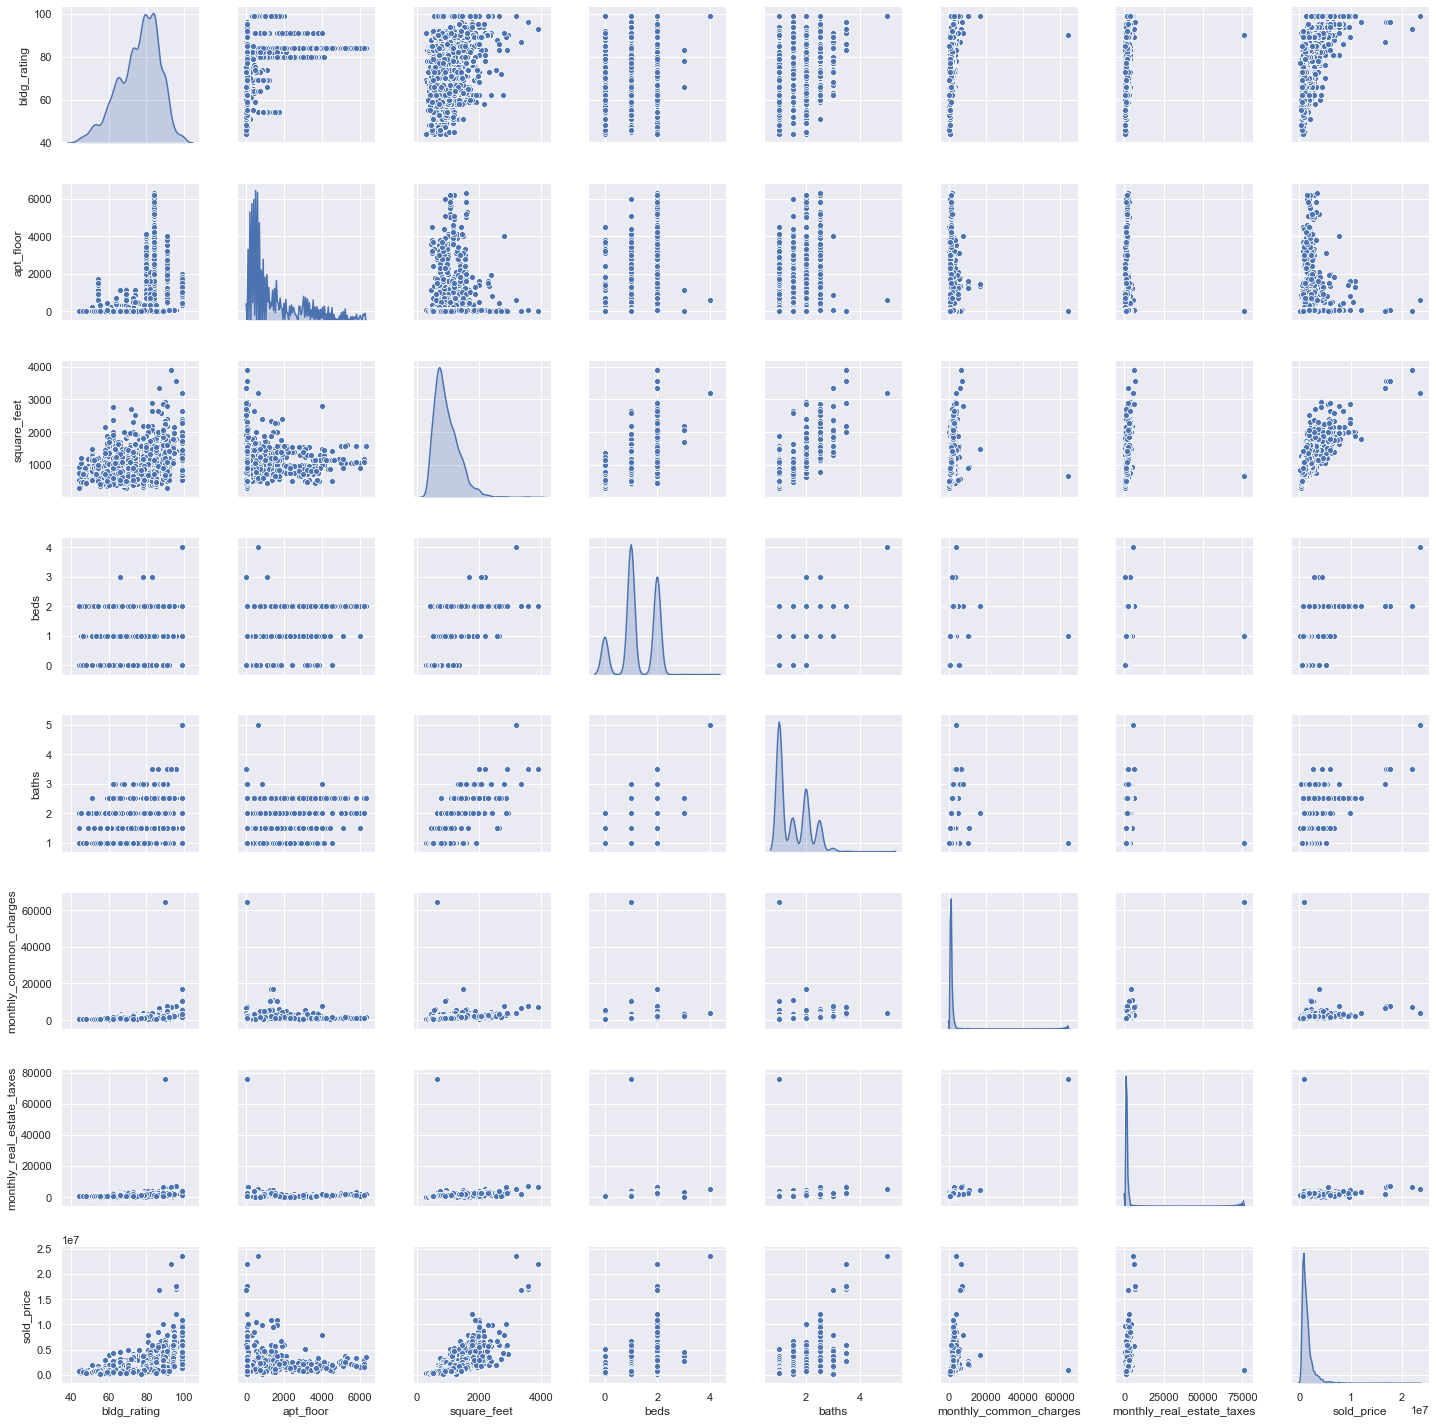

In [17]:
import seaborn as sns
%matplotlib inline

sns.set()
sns.pairplot(smaller_df, diag_kind='kde')

In [18]:
smaller_df.corr()

,bldg_rating,apt_floor,square_feet,beds,baths,monthly_common_charges,monthly_real_estate_taxes,sold_price
bldg_rating,1.000000,0.158575,0.318955,0.142058,0.293648,0.242628,0.168926,0.385960
apt_floor,0.158575,1.000000,0.074945,0.053500,0.099684,0.092855,0.033111,0.102819
square_feet,0.318955,0.074945,1.000000,0.748262,0.837736,0.438774,0.351844,0.781478
beds,0.142058,0.053500,0.748262,1.000000,0.766511,0.285950,0.237203,0.481778
baths,0.293648,0.099684,0.837736,0.766511,1.000000,0.351579,0.278796,0.616157
monthly_common_charges,0.242628,0.092855,0.438774,0.285950,0.351579,1.000000,0.864976,0.446790
monthly_real_estate_taxes,0.168926,0.033111,0.351844,0.237203,0.278796,0.864976,1.000000,0.347949
sold_price,0.385960,0.102819,0.781478,0.481778,0.616157,0.446790,0.347949,1.000000


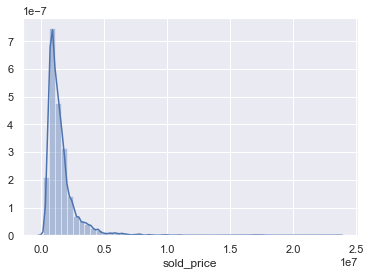

In [19]:
sns.distplot(smaller_df['sold_price'])

In [20]:
# Get Dummies
df_model = pd.get_dummies(smaller_df)

# Remove large outliers from sold

df_model.head()

,bldg_rating,apt_floor,square_feet,beds,baths,monthly_common_charges,monthly_real_estate_taxes,sold_price,sold_season_Fall,sold_season_Spring,sold_season_Summer,sold_season_Winter,neighborhood_Beekman/Sutton Place,neighborhood_Midtown East,neighborhood_Midtown West,neighborhood_Murray Hill,neighborhood_Turtle Bay/United Nations
1,78.0,25.0,650.0,1.0,1.0,814.0,948.0,799000.0,1,0,0,0,0,1,0,0,0
2,79.0,21.0,690.0,1.0,1.0,689.0,1315.0,1085000.0,1,0,0,0,0,0,1,0,0
3,73.0,6.0,1142.0,1.0,1.5,1683.0,1148.0,1039000.0,1,0,0,0,0,0,0,1,0
4,70.0,23.0,688.0,1.0,1.0,810.0,1511.0,1080000.0,1,0,0,0,0,0,0,1,0
5,82.0,10.0,1200.0,1.0,1.0,1676.0,1211.0,1400000.0,1,0,0,0,0,0,1,0,0


# Model

In [21]:
# Necessary imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [22]:
#target = ['sold_price']
#cont = ['bldg_rating', 
#        'apt_floor',
#        'square_feet', 
#        'beds', 
#        'baths', 
#        'monthly_common_charges', 
#        'monthly_real_estate_taxes']
#cat = ['sold_season', 'neighborhood']
#model_columns = cont + cat + target

X = df_model.drop('sold_price', axis = 1)
y = df_model['sold_price']

In [26]:
# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [27]:
X_train.shape

(4042, 16)

In [28]:
X_test.shape

(1011, 16)

In [29]:
column_1 = ['square_feet']
one_col_model = LinearRegression()
one_col_model.fit(X_train.loc[:, column_1], y_train)
one_col_model.score(X_train.loc[:, column_1], y_train)
#one_col_model.coef_, one_col_model.intercept_

0.6086788672501486

In [30]:
one_col_model.score(X_test.loc[:, column_1],y_test)

0.6171679066260001

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state = 1000)

lm = LinearRegression()
lm.fit(X_train, y_train)
print("Train Score: ", lm.score(X_train, y_train))
print("Test Score: ", lm.score(X_test, y_test))

np.mean(cross_val_score(lm, X_train, y_train, # estimator, features, target
                cv=kf, # number of folds 
                scoring='r2')) # scoring metric


Train Score:  0.6662164710497076
Test Score:  0.6775577489895296


array([ 1.23657014e+04,  2.93276636e+01,  2.86363338e+03, -3.32418512e+05,
       -1.08976730e+05,  1.28511583e+02, -4.29608258e+01,  6.68725994e+03,
       -3.02629193e+04, -2.88812687e+04,  5.24569281e+04, -2.05828042e+05,
        1.51032935e+05,  1.94511222e+05, -5.40914347e+04, -8.56246804e+04])

In [38]:
list(zip(X_train.columns,lm.coef_))

[('bldg_rating', 12365.701443414626),
 ('apt_floor', 29.327663638978038),
 ('square_feet', 2863.633380983829),
 ('beds', -332418.511588381),
 ('baths', -108976.72989113402),
 ('monthly_common_charges', 128.51158336538867),
 ('monthly_real_estate_taxes', -42.960825823256755),
 ('sold_season_Fall', 6687.259944112708),
 ('sold_season_Spring', -30262.919318091623),
 ('sold_season_Summer', -28881.268735368805),
 ('sold_season_Winter', 52456.92810934767),
 ('neighborhood_Beekman/Sutton Place', -205828.0419384364),
 ('neighborhood_Midtown East', 151032.93516677548),
 ('neighborhood_Midtown West', 194511.22191700398),
 ('neighborhood_Murray Hill', -54091.43473075015),
 ('neighborhood_Turtle Bay/United Nations', -85624.68041459301)]

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_train_scaled, y_train)
print(lm_reg.score(X_test_scaled, y_test))

np.mean(cross_val_score(lm_reg, X_, y, cv=kf, scoring = 'r2'))
#mean(cross_val_score)

0.677539171272591


0.4258382289232078

In [39]:
list(zip(X_train.columns,lm_reg.coef_))

[('bldg_rating', 132187.95166012648),
 ('apt_floor', 18138.145914394197),
 ('square_feet', 1118494.890894331),
 ('beds', -225879.8566384232),
 ('baths', -62637.54348769972),
 ('monthly_common_charges', 164400.4978906506),
 ('monthly_real_estate_taxes', -57398.52862346585),
 ('sold_season_Fall', 3302.3904230646995),
 ('sold_season_Spring', -12310.42811580444),
 ('sold_season_Summer', -12699.020042559901),
 ('sold_season_Winter', 22733.8852449234),
 ('neighborhood_Beekman/Sutton Place', -43742.4905371256),
 ('neighborhood_Midtown East', 29285.876410423003),
 ('neighborhood_Midtown West', 65088.04151734388),
 ('neighborhood_Murray Hill', -49801.344503920656),
 ('neighborhood_Turtle Bay/United Nations', -46399.96259451455)]

# Investigating Target Variable

In [85]:
df_clean.head()

,full_name,bldg_name,bldg_addr,apt_floor,bldg_rating,sold_date,sold_date_dt,sold_price,price_per_sqft,square_feet,bed_and_bath,beds,baths,url,listed,days_on_market,neighborhood,monthly_common_charges,monthly_real_estate_taxes,minimum_down_payment,doorman,last_price_change,sold_season,days_on_market
0,"Worldwide Plaza, 393 West 49th Street, #3P",Worldwide Plaza,393 West 49th Street,3.0,73.0,"Last Sold on Sep 27, 2019",2019-09-27,545000.0,NaN,NaN,"Studio, 1 bath",0.0,1.0,https://www.cityrealty.com/nyc/midtown-west/wo...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,NaN
1,"The Cosmopolitan, 145 East 48th Street, #25G",The Cosmopolitan,145 East 48th Street,25.0,78.0,"Last Sold on Sep 25, 2019",2019-09-25,799000.0,1229.0,650.0,"1 bed, 1 bath",1.0,1.0,https://www.cityrealty.com/nyc/midtown-east/th...,2019-04-12,177,Midtown East,814.0,948.0,0.1,FT Doorman,NaN,Fall,166.0
2,"The Orion, 350 West 42nd Street, #21F",The Orion,350 West 42nd Street,21.0,79.0,"Last Sold on Sep 24, 2019",2019-09-24,1085000.0,1572.0,690.0,"1 bed, 1 bath",1.0,1.0,https://www.cityrealty.com/nyc/midtown-west/th...,2019-04-12,176,Midtown West,689.0,1315.0,NaN,FT Doorman,NaN,Fall,165.0
3,"Morgan Court, 211 Madison Avenue, #6A",Morgan Court,211 Madison Avenue,6.0,73.0,"Last Sold on Sep 23, 2019",2019-09-23,1039000.0,910.0,1142.0,"1 bed, 1.5 baths",1.0,1.5,https://www.cityrealty.com/nyc/murray-hill/mor...,2019-03-06,214,Murray Hill,1683.0,1148.0,NaN,FT Doorman,NaN,Fall,201.0
4,"325 Fifth Avenue, #23F",NaN,325 Fifth Avenue,23.0,70.0,"Last Sold on Sep 23, 2019",2019-09-23,1080000.0,1570.0,688.0,"1 bed, 1 bath",1.0,1.0,https://www.cityrealty.com/nyc/murray-hill/325...,2019-05-28,132,Murray Hill,810.0,1511.0,NaN,FT Doorman,NaN,Fall,118.0


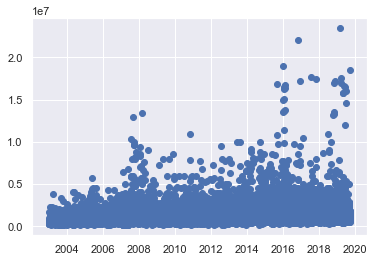

In [94]:
plt.scatter(df_clean['sold_date_dt'], df_clean['sold_price'])

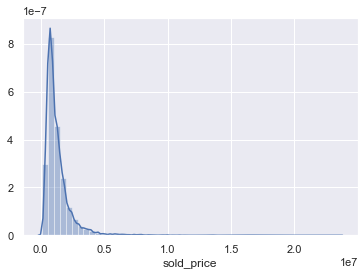

In [36]:
sns.distplot(df_clean['sold_price'])

In [99]:
len(df_clean) - len([df_clean['sold_price'] < 8000000])

14840

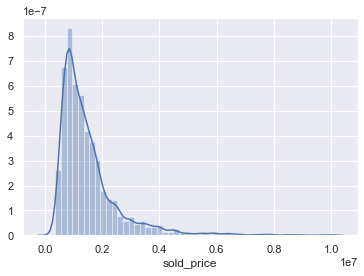

In [102]:
sns.distplot(df_model['sold_price'][df_model['sold_price'] < 10000000])